In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
eco = pd.read_excel("../data/TEIS-NSS Project Data 10-2022.xlsx",sheet_name=('ECO with Exit21-22'))
elig = pd.read_excel("../data/TEIS-NSS Project Data 10-2022.xlsx",sheet_name=('Elig Timeline Rpt 2018-2022'))

In [4]:
eco['CHILD_ID']

0       500335.0
1       479453.0
2       510663.0
3       452482.0
4       506507.0
          ...   
8631    514216.0
8632         NaN
8633         NaN
8634         NaN
8635         NaN
Name: CHILD_ID, Length: 8636, dtype: float64

In [5]:
elig['Child ID']

0        453926
1        431729
2        462474
3        446841
4        459629
          ...  
67605    509553
67606    509684
67607    526338
67608    511641
67609    519977
Name: Child ID, Length: 67610, dtype: int64

In [6]:
eco.head(10)

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,288.0,175.0,0.0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,444.0,348.0,90.0
7,ET,494502.0,2021-03-01,6.0,4.0,5.0,2021-10-15,7.0,5.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,277.0,228.0,0.0
8,ET,488351.0,2020-09-15,5.0,5.0,7.0,2021-02-25,6.0,5.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,343.0,163.0,0.0
9,ET,489949.0,2020-10-20,2.0,1.0,2.0,2021-09-30,1.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,533.0,345.0,0.0


In [7]:
eco.tail(10)

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,416.0,352.0,0.0
8627,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,361.0,176.0,0.0
8628,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,353.0,353.0,0.0
8629,UC,516136.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,130.0,-44574.0,-44574.0
8630,UC,490688.0,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,495.0,351.0,0.0
8631,UC,514216.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,65.0,-44537.0,-44537.0
8632,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8633,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8634,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8635,9/29/22 JM Corrected in TEIDS. Progress would ...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DISTRICT                              8633 non-null   object        
 1   CHILD_ID                              8632 non-null   float64       
 2   ECO_Entry_DATE                        5721 non-null   datetime64[ns]
 3   Ent SOCIAL_SCALE                      5721 non-null   float64       
 4   Ent KNOWLEDGE_SCALE                   5721 non-null   float64       
 5   Ent APPROPRIATE_ACTION_SCALE          5721 non-null   float64       
 6   ECO_Exit_DATE                         5721 non-null   datetime64[ns]
 7   Exit SOCIAL_SCALE                     5721 non-null   float64       
 8   Exit KNOWLEDGE_SCALE                  5721 non-null   float64       
 9   Exit APPROPRIATE_ACTION_SCALE         5721 non-null   float64       
 10  

In [9]:
eco['<Calc> Months in Program'].head()

0     7.0
1    23.0
2     4.0
3    35.0
4     6.0
Name: <Calc> Months in Program, dtype: float64

In [10]:
elig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   District                                          67610 non-null  object        
 1   Child ID                                          67610 non-null  int64         
 2   Child Status                                      67610 non-null  object        
 3   Child Phase                                       67610 non-null  object        
 4   Init. IFSP Due Date                               67610 non-null  datetime64[ns]
 5   IFSP Due Date                                     33237 non-null  datetime64[ns]
 6   IFSP Late Reason                                  4780 non-null   object        
 7   Active Ref. Date                                  67610 non-null  datetime64[ns]
 8   Parent Consent/Intake Date

In [11]:
elig.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [12]:
elig.tail()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
67605,UC,509553,Inactive,IFSP,2021-10-03,2021-10-22,System,2021-08-19,2021-08-26,2021-08-23 00:00:00,...,0.0,3.0,35.0,47.0,54.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2021-10-12,2021-12-10,618 - Moved out of state
67606,UC,509684,Inactive,IFSP,2021-10-07,2021-09-07,NaN,2021-08-23,2021-08-31,2021-08-24 00:00:00,...,0.0,7.0,0.0,2.0,10.0,Eligible,Developmental Evaluation,2021-09-02,2022-03-07,618 - Parent withdraw
67607,UC,526338,Inactive,IFSP,2022-05-22,2022-05-05,NaN,2022-04-07,2022-04-10,2022-04-08 00:00:00,...,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation,2022-04-13,2022-07-25,618 - Parent withdraw
67608,UC,511641,Inactive,Eligibility,2021-11-22,NaT,NaN,2021-10-08,2021-10-18,2021-10-11 00:00:00,...,0.0,7.0,NaN,11.0,21.0,Eligible,Diagnosed Condition,2021-10-29,2022-06-22,Parent decline
67609,UC,519977,Inactive,IFSP,2022-03-07,2022-02-03,NaN,2022-01-21,2022-01-26,2022-01-24 00:00:00,...,0.0,2.0,0.0,5.0,10.0,Eligible,Developmental Evaluation,2022-01-31,2022-06-20,618 - Part B eligible


### Clean up eco table.
With Child ID, District, and day count.
Rename columns to child_id, district, day_count

In [13]:
eco_count = eco[["CHILD_ID", "DISTRICT", "<Calc> Months in Program","Ent SOCIAL_SCALE","Ent KNOWLEDGE_SCALE","Ent APPROPRIATE_ACTION_SCALE","Exit SOCIAL_SCALE","Exit KNOWLEDGE_SCALE","Exit APPROPRIATE_ACTION_SCALE", 'OC1 Data Check']]

In [14]:
eco_count.columns = ['child_id', 'district', 'month_count', 'ent_social', 'ent_knowledge', 'ent_app_action', 'exit_social', 'exit_knowledge', 'exit_app_action', 'oc1']
eco_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   child_id         8632 non-null   float64
 1   district         8633 non-null   object 
 2   month_count      8632 non-null   float64
 3   ent_social       5721 non-null   float64
 4   ent_knowledge    5721 non-null   float64
 5   ent_app_action   5721 non-null   float64
 6   exit_social      5721 non-null   float64
 7   exit_knowledge   5721 non-null   float64
 8   exit_app_action  5721 non-null   float64
 9   oc1              8632 non-null   float64
dtypes: float64(9), object(1)
memory usage: 674.8+ KB


In [15]:
eco_count['district'].head(20)

0     ET
1     ET
2     ET
3     ET
4     ET
5     ET
6     ET
7     ET
8     ET
9     ET
10    ET
11    ET
12    ET
13    ET
14    ET
15    ET
16    ET
17    ET
18    ET
19    ET
Name: district, dtype: object

### Clean up ELIG table.
With Child ID, Elig Category, Day Count
Rename columns to child_id, elig_cat
Change data to float

In [16]:
elig_cat1 = elig[["Child ID", "Init. Elig. Category", 'District']]

In [17]:
elig_cat1.columns = ['child_id', 'elig_cat', 'district']

In [18]:
elig_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   child_id  67610 non-null  int64 
 1   elig_cat  38290 non-null  object
 2   district  67610 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [19]:
elig_cat1.head(20)

,child_id,elig_cat,district
0,453926,Developmental Evaluation,ET
1,431729,"Diagnosed Condition, Developmental Evaluation",ET
2,462474,Developmental Evaluation,ET
3,446841,Diagnosed Condition,ET
4,459629,Developmental Evaluation,ET
5,446765,Developmental Evaluation,ET
6,437348,Developmental Evaluation,ET
7,465218,Developmental Evaluation,ET
8,455537,Developmental Evaluation,ET
9,458383,Developmental Evaluation,ET


In [20]:
elig_cat1.groupby(['elig_cat'])['elig_cat'].count()

elig_cat
Developmental Evaluation                         28317
Diagnosed Condition                               4675
Diagnosed Condition, Developmental Evaluation     5298
Name: elig_cat, dtype: int64

In [21]:
elig_cat1["child_id"] = pd.to_numeric(elig_cat1["child_id"], downcast="float")

C:\Users\jhank\AppData\Local\Temp\ipykernel_4996\2981092489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_cat1["child_id"] = pd.to_numeric(elig_cat1["child_id"], downcast="float")


In [22]:
elig_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   child_id  67610 non-null  float32
 1   elig_cat  38290 non-null  object 
 2   district  67610 non-null  object 
dtypes: float32(1), object(2)
memory usage: 1.3+ MB


### Merge the two new tables.

In [23]:
eco_elig = pd.merge(eco_count, elig_cat1, how='outer',on=['child_id', 'district'])

In [24]:
eco_elig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67623 entries, 0 to 67622
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   child_id         67619 non-null  float64
 1   district         67620 non-null  object 
 2   month_count      8632 non-null   float64
 3   ent_social       5721 non-null   float64
 4   ent_knowledge    5721 non-null   float64
 5   ent_app_action   5721 non-null   float64
 6   exit_social      5721 non-null   float64
 7   exit_knowledge   5721 non-null   float64
 8   exit_app_action  5721 non-null   float64
 9   oc1              8632 non-null   float64
 10  elig_cat         38290 non-null  object 
dtypes: float64(9), object(2)
memory usage: 6.2+ MB


In [25]:
eco_elig.head(20)

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,oc1,elig_cat
0,500335.0,ET,7.0,5.0,3.0,4.0,6.0,3.0,4.0,1.0,Developmental Evaluation
1,479453.0,ET,23.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,Developmental Evaluation
2,510663.0,ET,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Developmental Evaluation
3,452482.0,ET,35.0,2.0,3.0,3.0,5.0,3.0,5.0,1.0,Developmental Evaluation
4,506507.0,ET,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Developmental Evaluation
5,494216.0,ET,9.0,2.0,4.0,6.0,4.0,5.0,7.0,1.0,Developmental Evaluation
6,449725.0,ET,14.0,4.0,5.0,7.0,7.0,7.0,7.0,1.0,Developmental Evaluation
7,494502.0,ET,9.0,6.0,4.0,5.0,7.0,5.0,6.0,1.0,Developmental Evaluation
8,488351.0,ET,11.0,5.0,5.0,7.0,6.0,5.0,7.0,1.0,Developmental Evaluation
9,489949.0,ET,18.0,2.0,1.0,2.0,1.0,4.0,5.0,1.0,"Diagnosed Condition, Developmental Evaluation"


In [26]:
eco_elig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67623 entries, 0 to 67622
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   child_id         67619 non-null  float64
 1   district         67620 non-null  object 
 2   month_count      8632 non-null   float64
 3   ent_social       5721 non-null   float64
 4   ent_knowledge    5721 non-null   float64
 5   ent_app_action   5721 non-null   float64
 6   exit_social      5721 non-null   float64
 7   exit_knowledge   5721 non-null   float64
 8   exit_app_action  5721 non-null   float64
 9   oc1              8632 non-null   float64
 10  elig_cat         38290 non-null  object 
dtypes: float64(9), object(2)
memory usage: 6.2+ MB


In [27]:
eco_elig = eco_elig[eco_elig['oc1'].notna()]


In [28]:
eco_elig

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,oc1,elig_cat
0,500335.0,ET,7.0,5.0,3.0,4.0,6.0,3.0,4.0,1.0,Developmental Evaluation
1,479453.0,ET,23.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,Developmental Evaluation
2,510663.0,ET,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Developmental Evaluation
3,452482.0,ET,35.0,2.0,3.0,3.0,5.0,3.0,5.0,1.0,Developmental Evaluation
4,506507.0,ET,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Developmental Evaluation
...,...,...,...,...,...,...,...,...,...,...,...
8627,485978.0,UC,12.0,1.0,3.0,5.0,5.0,7.0,7.0,1.0,Developmental Evaluation
8628,488802.0,UC,12.0,4.0,4.0,3.0,6.0,7.0,7.0,1.0,Developmental Evaluation
8629,516136.0,UC,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Developmental Evaluation
8630,490688.0,UC,17.0,4.0,5.0,7.0,7.0,7.0,7.0,1.0,Developmental Evaluation


### Add column for calculation of difference of scores

In [29]:
eco_elig['social_change'] = eco_elig['exit_social'] - eco_elig['ent_social']
eco_elig['knowledge_change'] = eco_elig['exit_knowledge'] - eco_elig['ent_knowledge']
eco_elig['app_action_change'] = eco_elig['exit_app_action'] - eco_elig['ent_app_action'] 

eco_elig.head(20)

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,oc1,elig_cat,social_change,knowledge_change,app_action_change
0,500335.0,ET,7.0,5.0,3.0,4.0,6.0,3.0,4.0,1.0,Developmental Evaluation,1.0,0.0,0.0
1,479453.0,ET,23.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,Developmental Evaluation,0.0,0.0,0.0
2,510663.0,ET,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Developmental Evaluation,NaN,NaN,NaN
3,452482.0,ET,35.0,2.0,3.0,3.0,5.0,3.0,5.0,1.0,Developmental Evaluation,3.0,0.0,2.0
4,506507.0,ET,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Developmental Evaluation,NaN,NaN,NaN
5,494216.0,ET,9.0,2.0,4.0,6.0,4.0,5.0,7.0,1.0,Developmental Evaluation,2.0,1.0,1.0
6,449725.0,ET,14.0,4.0,5.0,7.0,7.0,7.0,7.0,1.0,Developmental Evaluation,3.0,2.0,0.0
7,494502.0,ET,9.0,6.0,4.0,5.0,7.0,5.0,6.0,1.0,Developmental Evaluation,1.0,1.0,1.0
8,488351.0,ET,11.0,5.0,5.0,7.0,6.0,5.0,7.0,1.0,Developmental Evaluation,1.0,0.0,0.0
9,489949.0,ET,18.0,2.0,1.0,2.0,1.0,4.0,5.0,1.0,"Diagnosed Condition, Developmental Evaluation",-1.0,3.0,3.0


In [30]:
print(eco_elig[['ent_social', 'exit_social', 'social_change']].head(20))

    ent_social  exit_social  social_change
0          5.0          6.0            1.0
1          7.0          7.0            0.0
2          NaN          NaN            NaN
3          2.0          5.0            3.0
4          NaN          NaN            NaN
5          2.0          4.0            2.0
6          4.0          7.0            3.0
7          6.0          7.0            1.0
8          5.0          6.0            1.0
9          2.0          1.0           -1.0
10         NaN          NaN            NaN
11         3.0          7.0            4.0
12         NaN          NaN            NaN
13         3.0          5.0            2.0
14         NaN          NaN            NaN
15         1.0          7.0            6.0
16         6.0          7.0            1.0
17         2.0          2.0            0.0
18         7.0          7.0            0.0
19         2.0          5.0            3.0


In [31]:
eco_elig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 8631
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   child_id           8632 non-null   float64
 1   district           8632 non-null   object 
 2   month_count        8632 non-null   float64
 3   ent_social         5721 non-null   float64
 4   ent_knowledge      5721 non-null   float64
 5   ent_app_action     5721 non-null   float64
 6   exit_social        5721 non-null   float64
 7   exit_knowledge     5721 non-null   float64
 8   exit_app_action    5721 non-null   float64
 9   oc1                8632 non-null   float64
 10  elig_cat           8621 non-null   object 
 11  social_change      5721 non-null   float64
 12  knowledge_change   5721 non-null   float64
 13  app_action_change  5721 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1011.6+ KB


### Subset with just changes and child_id
Start graphs on this data

In [32]:
eco_change_cat = eco_elig[['social_change', 'knowledge_change', 'app_action_change','elig_cat','district']]

In [33]:
eco_change_cat.value_counts('elig_cat').count

<bound method Series.count of elig_cat
Developmental Evaluation                         6379
Diagnosed Condition, Developmental Evaluation    1276
Diagnosed Condition                               966
dtype: int64>

In [34]:
eco_change_cat

,social_change,knowledge_change,app_action_change,elig_cat,district
0,1.0,0.0,0.0,Developmental Evaluation,ET
1,0.0,0.0,0.0,Developmental Evaluation,ET
2,NaN,NaN,NaN,Developmental Evaluation,ET
3,3.0,0.0,2.0,Developmental Evaluation,ET
4,NaN,NaN,NaN,Developmental Evaluation,ET
...,...,...,...,...,...
8627,4.0,4.0,2.0,Developmental Evaluation,UC
8628,2.0,3.0,4.0,Developmental Evaluation,UC
8629,NaN,NaN,NaN,Developmental Evaluation,UC
8630,3.0,2.0,0.0,Developmental Evaluation,UC


In [35]:
sum_change = eco_change_cat.groupby(['elig_cat']).sum()


In [36]:
sum_change

,social_change,knowledge_change,app_action_change
elig_cat,,,
Developmental Evaluation,5795.0,2415.0,4255.0
Diagnosed Condition,1285.0,576.0,1352.0
"Diagnosed Condition, Developmental Evaluation",1567.0,679.0,1639.0


<AxesSubplot:xlabel='elig_cat'>

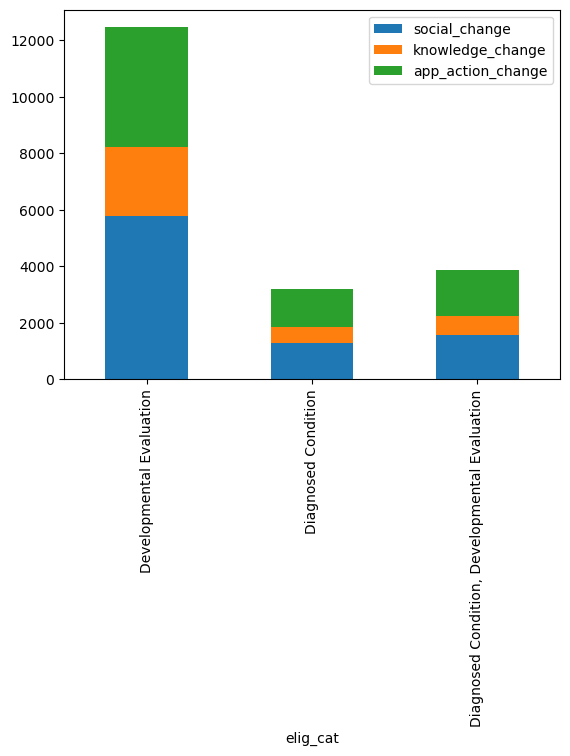

In [37]:
sum_change.plot.bar(stacked = True)

### Try again with the nulls dropped

In [38]:
drop_change_by_cat = eco_change_cat.dropna()

In [39]:
drop_change_by_cat.head(30)

,social_change,knowledge_change,app_action_change,elig_cat,district
0,1.0,0.0,0.0,Developmental Evaluation,ET
1,0.0,0.0,0.0,Developmental Evaluation,ET
3,3.0,0.0,2.0,Developmental Evaluation,ET
5,2.0,1.0,1.0,Developmental Evaluation,ET
6,3.0,2.0,0.0,Developmental Evaluation,ET
7,1.0,1.0,1.0,Developmental Evaluation,ET
8,1.0,0.0,0.0,Developmental Evaluation,ET
9,-1.0,3.0,3.0,"Diagnosed Condition, Developmental Evaluation",ET
11,4.0,2.0,4.0,Developmental Evaluation,ET
13,2.0,-3.0,-2.0,"Diagnosed Condition, Developmental Evaluation",ET


In [40]:
drop_change_by_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5717 entries, 0 to 8630
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   social_change      5717 non-null   float64
 1   knowledge_change   5717 non-null   float64
 2   app_action_change  5717 non-null   float64
 3   elig_cat           5717 non-null   object 
 4   district           5717 non-null   object 
dtypes: float64(3), object(2)
memory usage: 268.0+ KB


In [41]:
drop_change_by_cat.value_counts('elig_cat').count

<bound method Series.count of elig_cat
Developmental Evaluation                         4172
Diagnosed Condition, Developmental Evaluation     864
Diagnosed Condition                               681
dtype: int64>

In [42]:
display(drop_change_by_cat)

,social_change,knowledge_change,app_action_change,elig_cat,district
0,1.0,0.0,0.0,Developmental Evaluation,ET
1,0.0,0.0,0.0,Developmental Evaluation,ET
3,3.0,0.0,2.0,Developmental Evaluation,ET
5,2.0,1.0,1.0,Developmental Evaluation,ET
6,3.0,2.0,0.0,Developmental Evaluation,ET
...,...,...,...,...,...
8624,0.0,2.0,0.0,"Diagnosed Condition, Developmental Evaluation",UC
8626,5.0,3.0,4.0,Developmental Evaluation,UC
8627,4.0,4.0,2.0,Developmental Evaluation,UC
8628,2.0,3.0,4.0,Developmental Evaluation,UC


In [43]:
drop_change_by_cat.groupby(['elig_cat']).sum()

,social_change,knowledge_change,app_action_change
elig_cat,,,
Developmental Evaluation,5795.0,2415.0,4255.0
Diagnosed Condition,1285.0,576.0,1352.0
"Diagnosed Condition, Developmental Evaluation",1567.0,679.0,1639.0


<AxesSubplot:xlabel='social_change'>

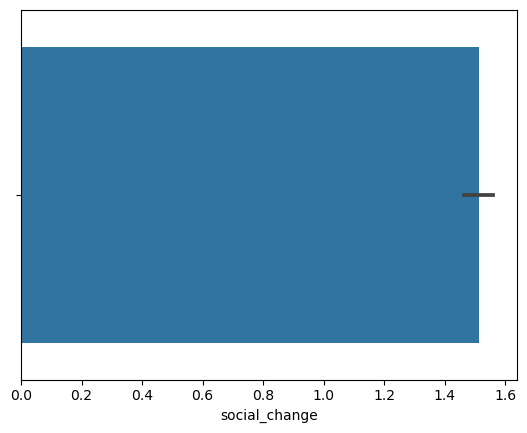

In [44]:
sns.barplot(data = drop_change_by_cat, x = 'social_change')

In [45]:
dcbc = drop_change_by_cat.groupby(['elig_cat'], as_index = False).mean()

In [46]:
dcbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   elig_cat           3 non-null      object 
 1   social_change      3 non-null      float64
 2   knowledge_change   3 non-null      float64
 3   app_action_change  3 non-null      float64
dtypes: float64(3), object(1)
memory usage: 224.0+ bytes


In [47]:
display(dcbc)

,elig_cat,social_change,knowledge_change,app_action_change
0,Developmental Evaluation,1.389022,0.578859,1.019895
1,Diagnosed Condition,1.886931,0.845815,1.985316
2,"Diagnosed Condition, Developmental Evaluation",1.813657,0.785880,1.896991


### Social Change graph

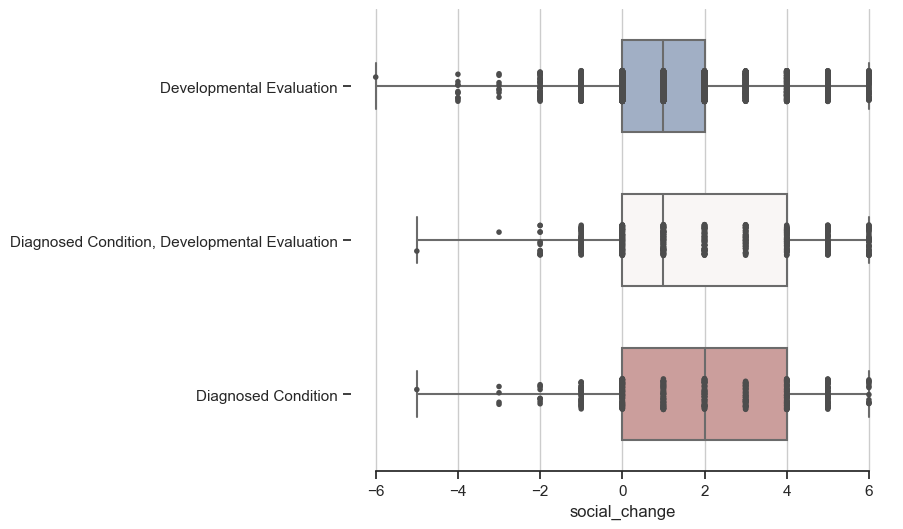

In [48]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="social_change", y="elig_cat", data=drop_change_by_cat,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="social_change", y="elig_cat", data=drop_change_by_cat,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### Knowledge Change Graph

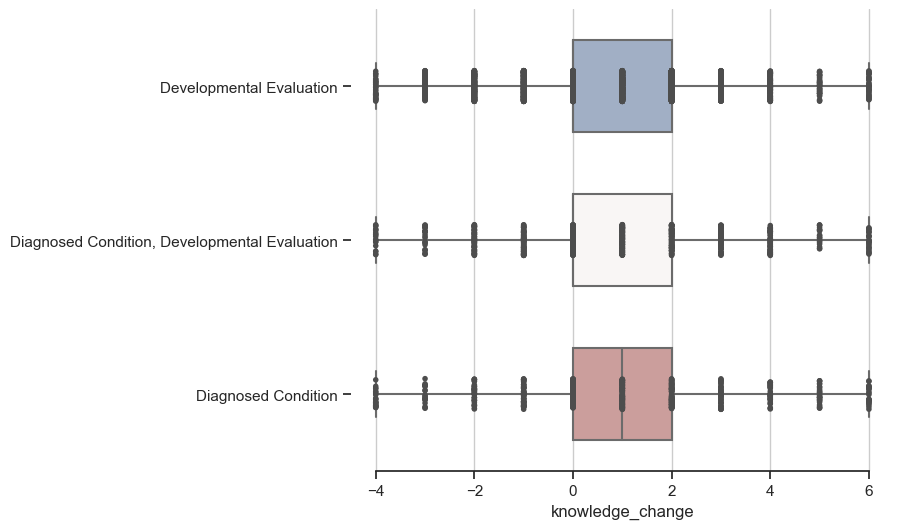

In [49]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="knowledge_change", y="elig_cat", data=drop_change_by_cat,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="knowledge_change", y="elig_cat", data=drop_change_by_cat,
              size=4, color=".3", linewidth=0)


ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### Appropriate Action Change

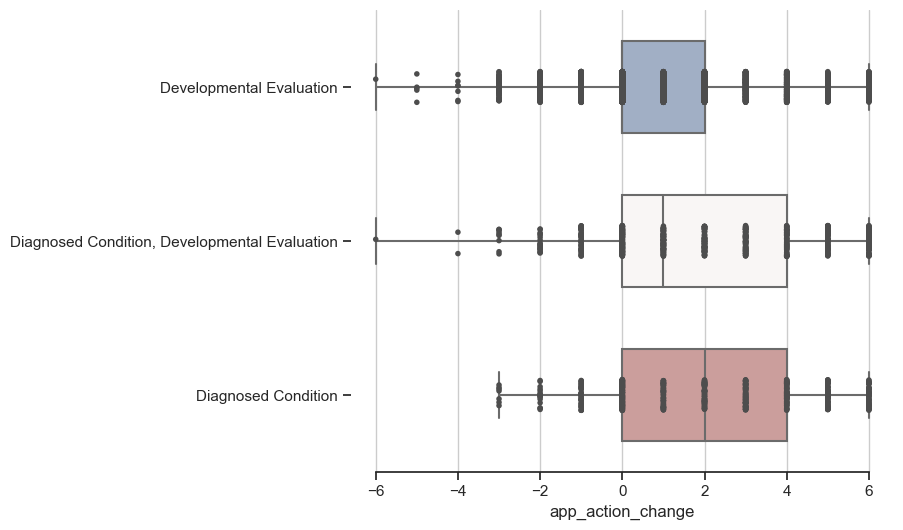

In [50]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="app_action_change", y="elig_cat", data=drop_change_by_cat,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="app_action_change", y="elig_cat", data=drop_change_by_cat,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### Each child is associated with a Point of Entry (POE) office, as indicated in column A of the "ECO with Exit21-22" column. Do the above comparison by POE as well, similar to the calculations in the "ECO by POE" tab.

In [51]:
drop_change_by_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5717 entries, 0 to 8630
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   social_change      5717 non-null   float64
 1   knowledge_change   5717 non-null   float64
 2   app_action_change  5717 non-null   float64
 3   elig_cat           5717 non-null   object 
 4   district           5717 non-null   object 
dtypes: float64(3), object(2)
memory usage: 397.0+ KB


In [52]:
poe1 = drop_change_by_cat[['social_change','knowledge_change', 'app_action_change', 'elig_cat']]

In [53]:
poe = drop_change_by_cat.dropna()

In [54]:
poe = poe[['social_change','knowledge_change', 'app_action_change', 'district']]

In [55]:
poe_sum = poe.groupby(['district'], as_index = False).sum()

<AxesSubplot:>

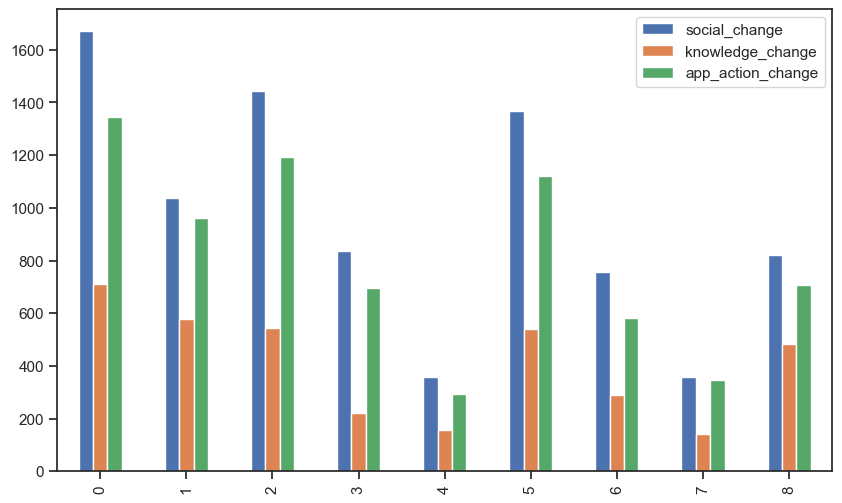

In [56]:
poe_sum.plot(kind = 'bar',figsize = (10,6))

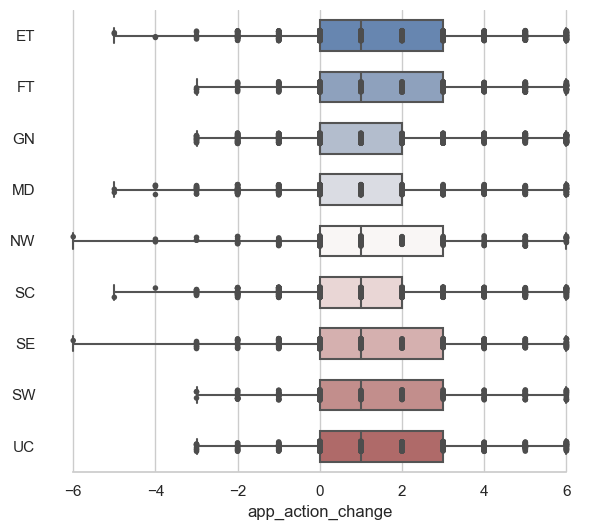

In [57]:
sns.set_theme(style="whitegrid", palette="pastel")

#sns.color_palette("dark:#5A9_r", as_cmap=True)

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="app_action_change", y="district", data=poe,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="app_action_change", y="district", data=poe,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# Pretty this one up.  

Clean up, add value labels, remove bars. 

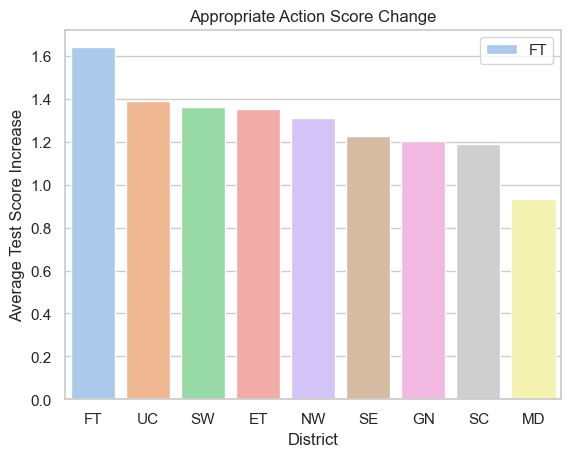

In [96]:
a = sns.barplot(data=poe, x='district', y='app_action_change',\
            order= ('FT','UC','SW','ET','NW','SE','GN','SC','MD'),ci=None)
a = plt.xlabel('District')
a = plt.ylabel('Average Test Score Increase')
a = plt.title('Appropriate Action Score Change')
plt.legend(loc='upper right', labels=['FT','UC',''])
plt.show(g)

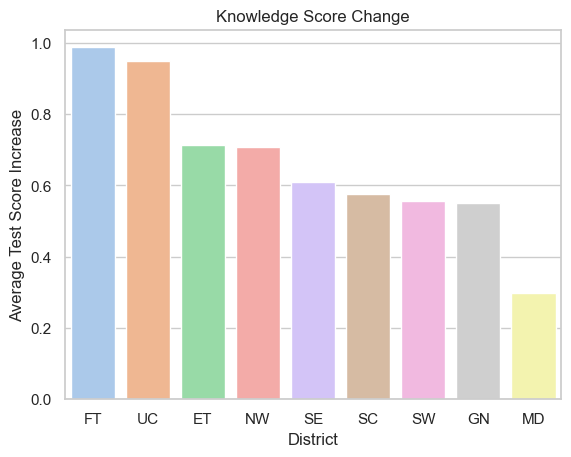

In [74]:
sns.barplot(data=poe, x='district', y='knowledge_change',
            order= ('FT','UC','ET','NW','SE','SC','SW','GN','MD'),ci=None)
a = plt.xlabel('District')
a = plt.ylabel('Average Test Score Increase')
a = plt.title('Knowledge Score Change')
new_title = 'My title'
g._legend.set_title(new_title)
# replace labels
new_labels = ['label 1', 'label 2']

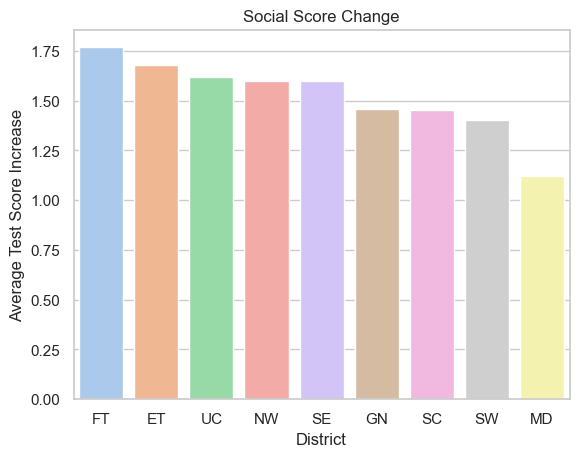

In [75]:
sns.barplot(data=poe, x='district', y='social_change',\
            order= ('FT','ET','UC','NW','SE','GN','SC','SW','MD'),ci=None)
a = plt.xlabel('District')
a = plt.ylabel('Average Test Score Increase')
a = plt.title('Social Score Change')

<AxesSubplot:xlabel='elig_cat', ylabel='app_action_change'>

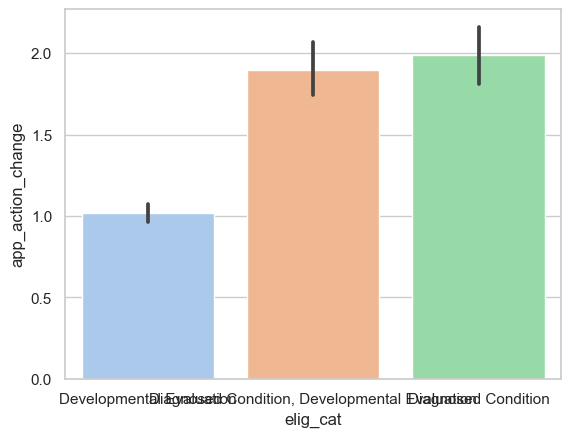

In [61]:
sns.barplot(data=poe1, x='elig_cat', y='app_action_change')

<AxesSubplot:xlabel='elig_cat', ylabel='social_change'>

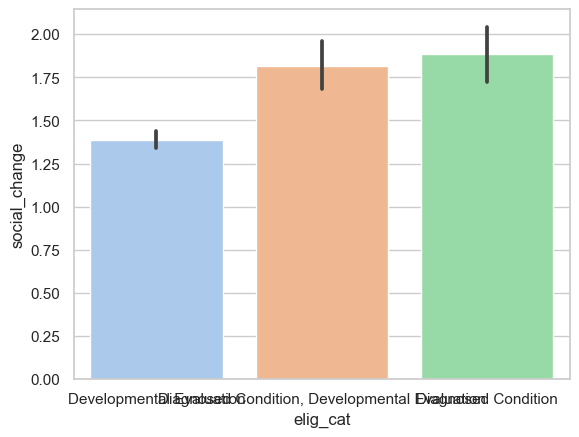

In [62]:
sns.barplot(data=poe1, x='elig_cat', y='social_change')

In [63]:
poe1.head()

,social_change,knowledge_change,app_action_change,elig_cat
0,1.0,0.0,0.0,Developmental Evaluation
1,0.0,0.0,0.0,Developmental Evaluation
3,3.0,0.0,2.0,Developmental Evaluation
5,2.0,1.0,1.0,Developmental Evaluation
6,3.0,2.0,0.0,Developmental Evaluation


<AxesSubplot:title={'center':'Developmental Evaluation'}>

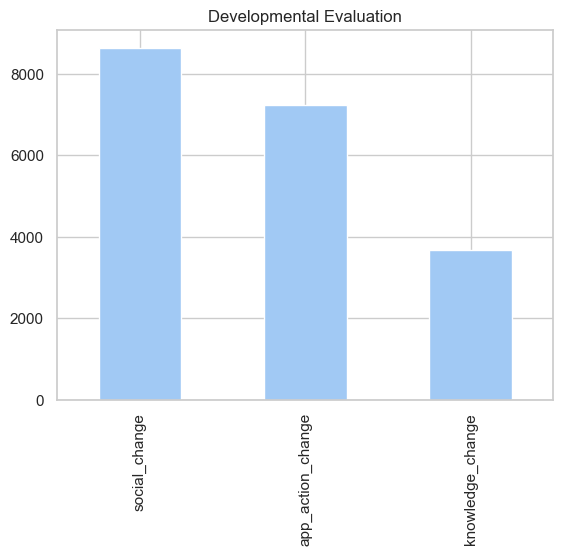

In [64]:
elig1avg = poe1[['social_change', 'app_action_change', 'knowledge_change']].sum()
elig1avg.plot(kind="bar", title='Developmental Evaluation')


<AxesSubplot:>

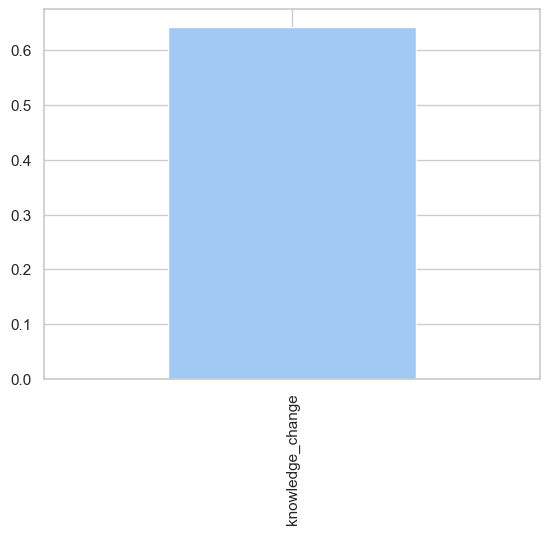

In [65]:
elig1avg = poe1[['knowledge_change']].mean()
elig1avg.plot(kind="bar")

In [85]:
eco_elig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 8631
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   child_id           8632 non-null   float64
 1   district           8632 non-null   object 
 2   month_count        8632 non-null   float64
 3   ent_social         5721 non-null   float64
 4   ent_knowledge      5721 non-null   float64
 5   ent_app_action     5721 non-null   float64
 6   exit_social        5721 non-null   float64
 7   exit_knowledge     5721 non-null   float64
 8   exit_app_action    5721 non-null   float64
 9   oc1                8632 non-null   float64
 10  elig_cat           8621 non-null   object 
 11  social_change      5721 non-null   float64
 12  knowledge_change   5721 non-null   float64
 13  app_action_change  5721 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1011.6+ KB


KeyError: "None of [Index(['social_change'], dtype='object')] are in the [columns]"

<Figure size 10000x10000 with 0 Axes>

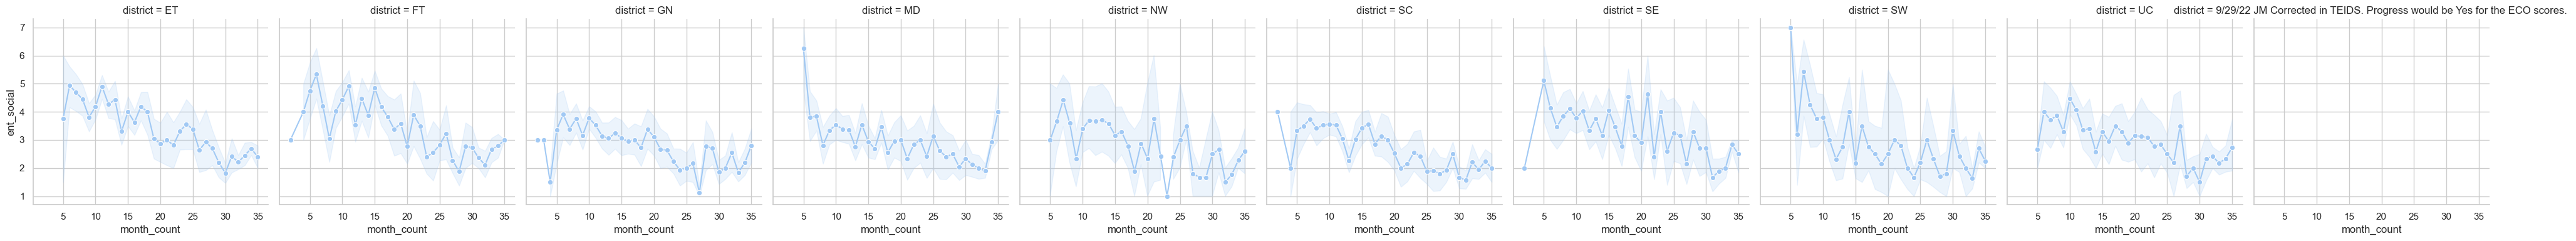

In [84]:
plt.figure(figsize=(100,100))

g = sns.FacetGrid(eco_count, col = 'district', height =4)
g.map(sns.lineplot,'month_count', 'ent_social', marker='o')
g.axes[0,0].set_xlabel('month_count')
g.axes[0,1].set_xlabel('month_count')
g.axes[0,2].set_xlabel('month_count')

# Average point increase for test scores based on elig cat
g = g.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'social_change')
